# K-Means Clustering

- Clustering is an unsupervised machine learning technique used to group similar data points together based on their features.
-  The primary goal of clustering is to discover the underlying structure or patterns within a dataset without prior knowledge of the group labels.

### K-Means clustering is one of the most popular clustering algorithm used for analysis of unlabeled data.
-  It aims to partition a dataset into k clusters, where each data point belongs to the cluster with the nearest mean (centroid).
- The algorithm seeks to minimize the `Within-Cluster Sum of Squares (WCSS)`, which is the sum of the squared distances between each data point and its assigned cluster centroid.

Advantages of this technique include:
- Simplicity
- Scalability
- Speed (Based on initialization)

Applications of K-Means
- Customer Segmentation: Grouping customers based on purchasing behavior or demographics.
- Image Segmentation: Dividing an image into regions for analysis or compression.
- Document Clustering: Organizing documents into topics or themes.
- Anomaly Detection: Identifying unusual data points that do not fit into any cluster.


### In today's discussion, we'll be going through a visualization on K-Means clustering and how exactly it works under the hood.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [64]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.6)

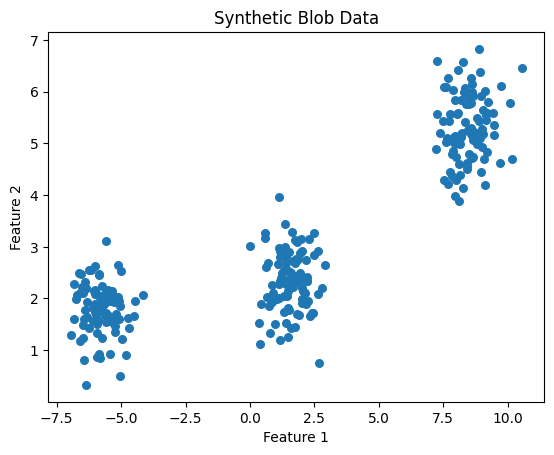

In [65]:
plt.scatter(X[:,0], X[:, 1], s=30)
plt.title('Synthetic Blob Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [66]:
X.shape[0]

300

In [73]:
#here we're using the random initialization
print(X[0])
centroids = X[np.random.choice(X.shape[0], 3, replace=False)]
print("Initial centroids: ", centroids)
cluster_history = []
for _ in range(1):
    #X[:, np.newaxis]: This adds a new axis to X, transforming it from a shape of (n_samples, n_features) to (n_samples, 1, n_features)
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)    #computes the euclidean distance along the feature axis. results in shape (n_samples, k)
    print("Distance of data point 1 from the centroids: ", distances[0])
    labels = np.argmin(distances, axis=1)                               #takes that index with smallest distance to a centroid
    print("Closest cluster: ", labels[0])
    cluster_history.append((centroids.copy(), labels.copy()))
    new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(3)])
    print("Centroids after 1 iteration: ", new_centroids)


[-4.14582104  2.07215521]
Initial centroids:  [[ 7.76784043  4.44521973]
 [ 8.00237971  4.29439904]
 [-5.88424295  2.06700193]]
Distance of data point 1 from the centroids:  [12.14770616 12.34978336  1.73842954]
Closest cluster:  2
Centroids after 1 iteration:  [[ 4.19980989  3.62517053]
 [ 8.90891094  5.05804038]
 [-4.68858866  1.8502113 ]]


In [78]:
X[:, np.newaxis] - centroids    #difference between each data point and each centroid, resulting in an array of shape (n_samples, k, n_features)

array([[[-1.19136615e+01, -2.37306453e+00],
        [-1.21482008e+01, -2.22224383e+00],
        [ 1.73842191e+00,  5.15328290e-03]],

       [[-7.12757231e+00, -1.82775029e+00],
        [-7.36211159e+00, -1.67692960e+00],
        [ 6.52451106e+00,  5.50467513e-01]],

       [[ 8.50597950e-01,  2.80384327e-01],
        [ 6.16058669e-01,  4.31205024e-01],
        [ 1.45026813e+01,  2.65860213e+00]],

       ...,

       [[-6.20470414e+00, -1.93526252e+00],
        [-6.43924342e+00, -1.78444182e+00],
        [ 7.44737924e+00,  4.42955290e-01]],

       [[ 1.12304350e+00,  9.80487845e-01],
        [ 8.88504219e-01,  1.13130854e+00],
        [ 1.47751269e+01,  3.35870565e+00]],

       [[-1.39187935e+01, -1.90386120e+00],
        [-1.41533327e+01, -1.75304051e+00],
        [-2.66710086e-01,  4.74356606e-01]]])

In [84]:
# function that performs k-means clustering
def k_means(X, k, max_iters=10):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    cluster_history = []
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)    #computes the euclidean distance along the feature axis. results in shape (n_samples, k)
        labels = np.argmin(distances, axis=1)                               #takes that index with smallest distance to a centroid
        cluster_history.append((centroids.copy(), labels.copy()))
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):  # Check for convergence
            break
        centroids = new_centroids
    return labels, centroids, cluster_history

In [109]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1, random_state=42)
k = 4
labels, final_centroids, history = k_means(X, k)

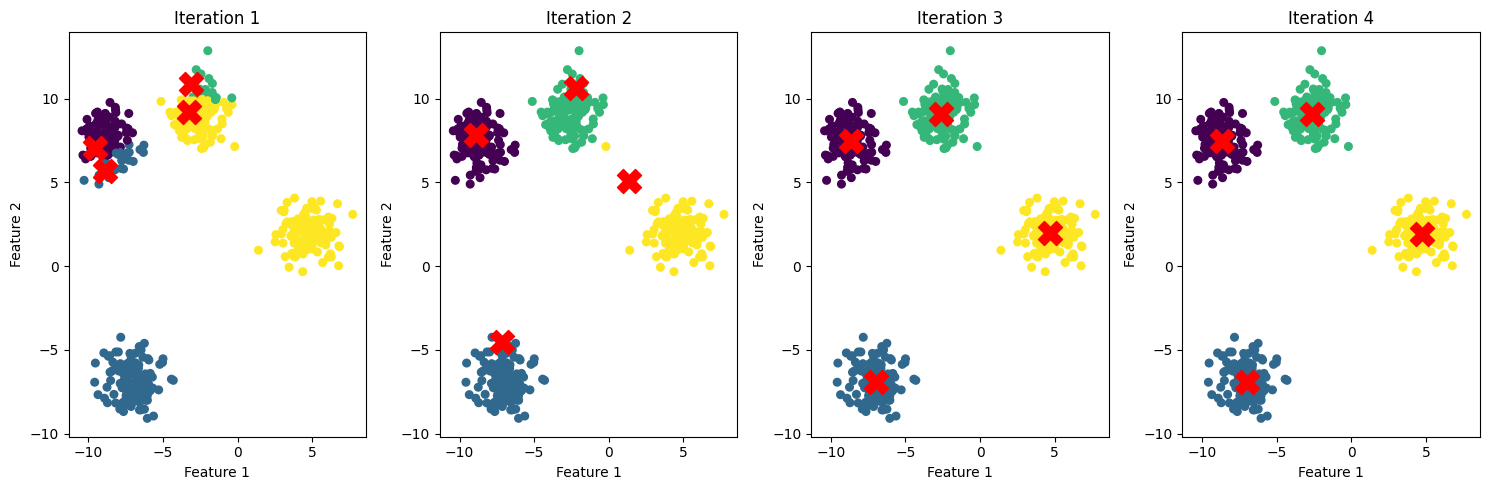

In [110]:
num_iterations = len(history)
fig, axs = plt.subplots(1, num_iterations, figsize=(15, 5))
for i, (centroids, labels) in enumerate(history):
    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axs[i].scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
    axs[i].set_title(f'Iteration {i + 1}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()

## K-Means ++

- k-Means++ is an enhancement of the traditional k-means clustering algorithm that improves the selection of initial centroids
- This method aims to address the sensitivity of k-means to the initial placement of centroids, which can affect the `quality and convergence speed` of the clustering process

In [128]:
def initialize_centroids(X, k):
    n_samples = X.shape[0]
    centroids = np.empty((k, X.shape[1]))

    # Randomly choose the first centroid
    centroids[0] = X[np.random.choice(n_samples)]

    for i in range(1, k):
        # Compute distances from each point to the nearest centroid
        distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids[:i], axis=2), axis=1)
        # Choose the next centroid with a probability proportional to the square of the distance
        probabilities = distances**2 / np.sum(distances**2)
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for j, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids[i] = X[j]
                break
                
    return centroids

In [129]:
# function that performs k-means clustering
def k_means_pp(X, k, max_iters=10):
    centroids = initialize_centroids(X, k)
    cluster_history = []
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)    #computes the euclidean distance along the feature axis. results in shape (n_samples, k)
        labels = np.argmin(distances, axis=1)                               #takes that index with smallest distance to a centroid
        cluster_history.append((centroids.copy(), labels.copy()))
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):  # Check for convergence
            break
        centroids = new_centroids
    return labels, centroids, cluster_history

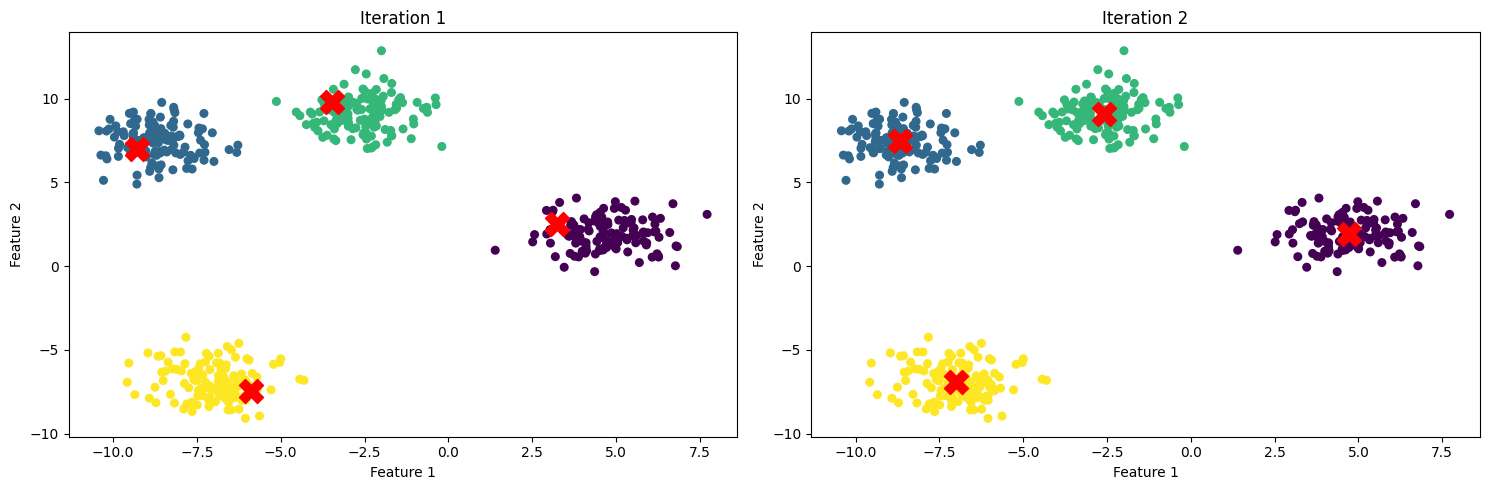

In [130]:
k = 4
labels_kpp, final_centroids_kpp, history_kpp = k_means(X, k)
num_iterations = len(history_kpp)
fig, axs = plt.subplots(1, num_iterations, figsize=(15, 5))
for i, (centroids, labels) in enumerate(history_kpp):
    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axs[i].scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
    axs[i].set_title(f'Iteration {i + 1}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()